In [1]:
%matplotlib widget
from Code_utilities.SeriesAnalyzer_2 import SeriesAnalyzer_2
from Code_utilities.BeamAnalysis import BeamAnalysis

HIKMICRO_dir_path = (
    '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/HIKMICRO_PowerSeries')

x_center_HIKMICRO = 152 - 1
y_center_HIKMICRO = 122
width = 40
measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO = .204 * 3.08
angle_pol_voltage_measurement_HIKMICRO = 90
moved_pol = 'first'
crop_x_range_HIKMICRO = (x_center_HIKMICRO - width / 2, x_center_HIKMICRO + width / 2)
crop_y_range_HIKMICRO = (y_center_HIKMICRO - width / 2, y_center_HIKMICRO + width / 2)
filename = '20 degrees.csv'

beam_analysis_HIKMICRO = BeamAnalysis(dir_path=HIKMICRO_dir_path,
                                      signal_filename=filename,
                                      camera_name='HIKMICRO',
                                      crop_range_x_pixels=crop_x_range_HIKMICRO,
                                      crop_range_y_pixels=crop_y_range_HIKMICRO)
fig_HIKMICRO, ax_HIKMICRO = beam_analysis_HIKMICRO.plot_map_in_pixels()

Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer
Moved first polarizer


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Map'}, xlabel='x (um)', ylabel='y (um)'>)

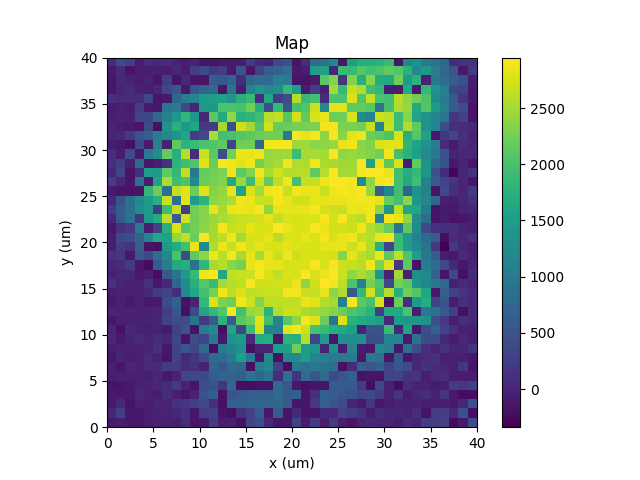

In [2]:
%matplotlib widget
import numpy as np

HIKMICRO_SeriesAnalyzer = SeriesAnalyzer_2(dir_path=HIKMICRO_dir_path,
                                           camera_name='HIKMICRO',
                                           Y_ref_position_for_background_subtraction=2,
                                           crop_range_x_pixels=crop_x_range_HIKMICRO,
                                           crop_range_y_pixels=crop_y_range_HIKMICRO)

slope_map = HIKMICRO_SeriesAnalyzer.compute_slope_map(save_data_plot_bool=True,
                                                      known_angle=angle_pol_voltage_measurement_HIKMICRO,
                                                      kown_voltage_at_known_angle_in_V=measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO,
                                                      moved_polarizer=moved_pol)
HIKMICRO_SeriesAnalyzer.plot_map_in_pixels(slope_map)

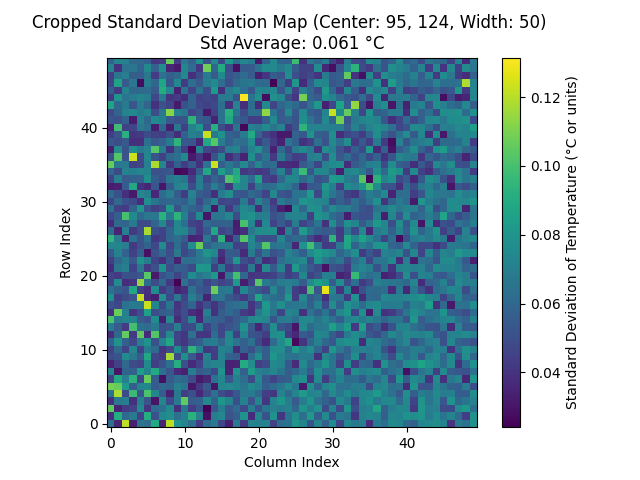

In [3]:
from Code_utilities.VideoUtilities.VideoAnalyzer import VideoAnalyzer
%matplotlib widget
csv_file_path = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250508/Noise_Analysis/IR_00002_Temperature Matrix.csv'
cropping_center_x = 70 + 25
cropping_center_y = 124
cropping_width = 50
video_analysis = VideoAnalyzer(csv_file_path)
fig_copped, ax_cropped, cropped_std_dev_map = video_analysis.plot_std_dev_cropped(crop_width_pixels=cropping_width,
                                                                                  center_x=cropping_center_x,
                                                                                  center_y=cropping_center_y)
std_average = np.mean(cropped_std_dev_map)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Map'}, xlabel='x (um)', ylabel='y (um)'>)

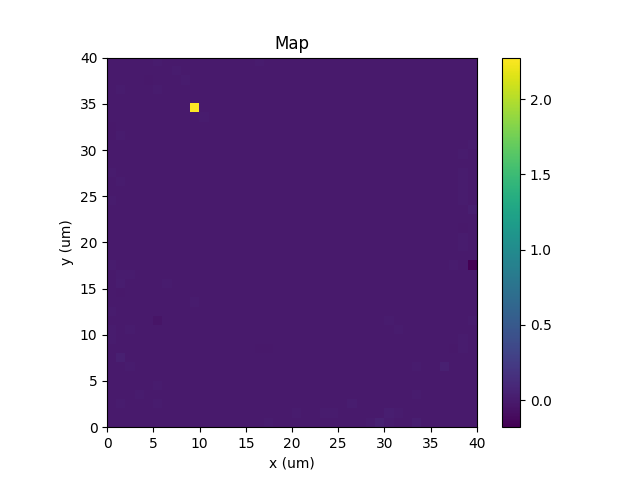

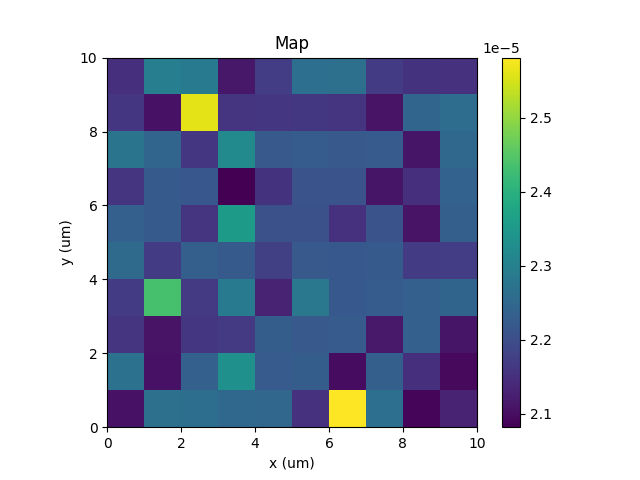

In [9]:
%matplotlib widget

def select_center_square(array_2d,
                         square_width):
    """
    Selects a square region from the middle of a 2D NumPy array.

    Args:
        array_2d (np.ndarray): The input 2D NumPy array.
        square_width (int): The desired width (and height) of the square region.
                            Should be an odd number for a perfect center,
                            or an even number (will be centered as best as possible).

    Returns:
        np.ndarray: The selected square region from the center of the array.
                    Returns None if the square_width is larger than array dimensions.
    """
    rows, cols = array_2d.shape

    if square_width > rows or square_width > cols:
        print(f"Error: square_width ({square_width}) is larger than array dimensions ({rows}x{cols}).")
        return None

    # Calculate center indices
    center_row = rows // 2
    center_col = cols // 2

    # Calculate half width, adjusting for even/odd square_width
    half_width_rows_start = square_width // 2
    half_width_rows_end = (square_width + 1) // 2  # Handles odd width correctly
    half_width_cols_start = square_width // 2
    half_width_cols_end = (square_width + 1) // 2

    # Calculate start and end indices for slicing
    start_row = center_row - half_width_rows_start
    end_row = center_row + half_width_rows_end
    start_col = center_col - half_width_cols_start
    end_col = center_col + half_width_cols_end

    # Ensure indices are within bounds (though the initial check should cover most cases)
    start_row = max(0,
                    start_row)
    end_row = min(rows,
                  end_row)
    start_col = max(0,
                    start_col)
    end_col = min(cols,
                  end_col)

    # Slice the array
    center_square = array_2d[start_row:end_row, start_col:end_col]

    return center_square


NEP_map = std_average / slope_map
HIKMICRO_SeriesAnalyzer.plot_map_in_pixels(NEP_map)

square_width = 10
NEP_map_filtered = select_center_square(NEP_map,
                                        square_width=square_width)

# Plot the filtered map
fig, ax=HIKMICRO_SeriesAnalyzer.plot_map_in_pixels(NEP_map_filtered)
fig.savefig('NEP_map_filtered.png')



In [11]:
NEP_average_uW = np.mean(NEP_map_filtered)
NEP_average_nW = NEP_average_uW * 1e3
NEP_average_nW

0.022073023530552023